In [1]:
#Load libraries

import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import shap
import lime
import lime.lime_tabular
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.svm import SVC
#print('done')

In [2]:
#Load wine dataset

df = pd.read_csv('D:/SDU/thesisCodes/data/datasets_4458_8204_winequality-red.csv') # Load the data

# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

#print(X)
#print(Y)

In [3]:
#Build the random forest classifier
rf = RandomForestClassifier(max_depth=6, random_state=0, n_estimators=10)
rf.fit(X_train, Y_train)

yPredRf = rf.predict(X_test)
print(metrics.classification_report(Y_test, yPredRf))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       290
           1       0.54      0.47      0.50        30

    accuracy                           0.91       320
   macro avg       0.74      0.71      0.73       320
weighted avg       0.91      0.91      0.91       320



Text(0, 0.5, 'Cross-validated accuracy')

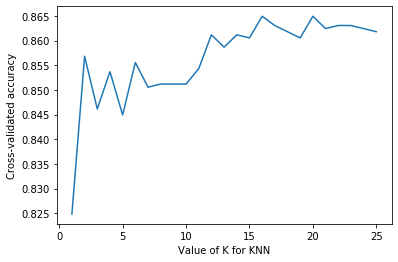

In [4]:
#Start KNN implementation. Do elbow method to define number of K

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# Number of k from 1 to 26
k_range = range(1, 26)
k_scores = []
# Calculate cross validation score for every k number from 1 to 26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # It’s 10 fold cross validation with ‘accuracy’ scoring 
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
    
%matplotlib inline
# Plot accuracy for every k number between 1 and 26
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [5]:
# Train the model and use k=16
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, Y_train)
yPredKNN = knn.predict(X_test)

# classification report for test set
print(metrics.classification_report(Y_test, yPredKNN))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       290
           1       0.75      0.10      0.18        30

    accuracy                           0.91       320
   macro avg       0.83      0.55      0.57       320
weighted avg       0.90      0.91      0.88       320



In [6]:
#Train GNB model

gnb=GaussianNB()
gnb.fit(X_train,Y_train)

yPredGNB = gnb.predict(X_test)


# classification report for test set
print(metrics.classification_report(Y_test, yPredGNB))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       290
           1       0.32      0.77      0.45        30

    accuracy                           0.82       320
   macro avg       0.65      0.80      0.67       320
weighted avg       0.91      0.82      0.85       320



In [7]:
#Train XGB model

xgbModel = xgb.XGBClassifier(random_state=1)
xgbModel.fit(X_train, Y_train)
yPredXGB = xgbModel.predict(X_test)
print(metrics.classification_report(Y_test, yPredXGB))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       290
           1       0.53      0.77      0.63        30

    accuracy                           0.92       320
   macro avg       0.75      0.85      0.79       320
weighted avg       0.93      0.92      0.92       320



In [8]:
#Train SVM model with radial kernel

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

yPredSVM = svclassifier.predict(X_test)
print(metrics.classification_report(Y_test, yPredSVM))

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.


              precision    recall  f1-score   support

           0       0.93      0.98      0.95       290
           1       0.57      0.27      0.36        30

    accuracy                           0.91       320
   macro avg       0.75      0.62      0.66       320
weighted avg       0.89      0.91      0.90       320



In [9]:
#Implement ELI5
#Importing the module
from eli5 import show_weights, show_prediction
from eli5.sklearn import PermutationImportance

In [10]:
#Get Permutation Importance for RF

print("Permutation importance RF")
perm1 = PermutationImportance(rf, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm1, feature_names = list(X_test.columns))


Permutation importance RF


Weight,Feature
0.0231 ± 0.0161,sulphates
0.0175 ± 0.0116,alcohol
0.0150 ± 0.0073,total sulfur dioxide
0.0056 ± 0.0108,fixed acidity
0.0012 ± 0.0085,pH
0.0012 ± 0.0102,residual sugar
0.0006 ± 0.0061,free sulfur dioxide
-0.0013 ± 0.0135,citric acid
-0.0031 ± 0.0079,chlorides
-0.0069 ± 0.0047,volatile acidity


In [11]:
#Get Permutation Importance for KNN

print("Permutation importance KNN")
perm2 = PermutationImportance(knn, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm2, feature_names = list(X_test.columns))

Permutation importance KNN


Weight,Feature
0.0100 ± 0.0083,alcohol
0.0075 ± 0.0116,fixed acidity
0.0069 ± 0.0083,total sulfur dioxide
0.0025 ± 0.0061,free sulfur dioxide
0 ± 0.0000,sulphates
0 ± 0.0000,pH
0 ± 0.0000,density
0 ± 0.0000,chlorides
0 ± 0.0000,citric acid
0 ± 0.0000,volatile acidity


In [12]:
#Get Permutation Importance for XGB

print("Permutation importance XGB")
perm3 = PermutationImportance(xgbModel, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm3, feature_names = list(X_test.columns))

Permutation importance XGB


Weight,Feature
0.0125 ± 0.0119,total sulfur dioxide
0.0119 ± 0.0179,sulphates
0.0088 ± 0.0073,free sulfur dioxide
0.0063 ± 0.0143,alcohol
0.0056 ± 0.0073,fixed acidity
-0.0044 ± 0.0156,volatile acidity
-0.0050 ± 0.0161,pH
-0.0062 ± 0.0143,residual sugar
-0.0094 ± 0.0088,chlorides
-0.0106 ± 0.0064,citric acid


In [13]:
#Get Permutation Importance for GNB

print("Permutation importance GNB")
perm4 = PermutationImportance(gnb, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm4, feature_names = list(X_test.columns))

Permutation importance GNB


Weight,Feature
0.0075 ± 0.0233,chlorides
0.0062 ± 0.0040,total sulfur dioxide
0.0037 ± 0.0191,free sulfur dioxide
0.0025 ± 0.0083,pH
0.0012 ± 0.0346,alcohol
0 ± 0.0000,residual sugar
-0.0038 ± 0.0121,density
-0.0069 ± 0.0207,sulphates
-0.0088 ± 0.0263,citric acid
-0.0144 ± 0.0102,fixed acidity


In [14]:
#Get Permutation Importance for SVM

print("Permutation importance SVM")
perm5 = PermutationImportance(svclassifier, scoring = 'accuracy' ,random_state=101).fit(X_test, Y_test)
show_weights(perm5, feature_names = list(X_test.columns))

Permutation importance SVM


Weight,Feature
0.0169 ± 0.0129,alcohol
0.0087 ± 0.0145,total sulfur dioxide
0.0062 ± 0.0088,free sulfur dioxide
0.0037 ± 0.0047,volatile acidity
0.0025 ± 0.0025,citric acid
0.0012 ± 0.0050,pH
0.0006 ± 0.0121,fixed acidity
0 ± 0.0000,density
0 ± 0.0000,chlorides
-0.0006 ± 0.0047,sulphates


In [15]:
#Get local explanation for XGB and RF 1st row of data

show_prediction(xgbModel, X_test.iloc[1], show_feature_values=True)
show_prediction(rf, X_test.iloc[1], show_feature_values=True)

In [16]:
#Get local explanation for RF 319th row of data

show_prediction(rf, X_test.iloc[319], show_feature_values=True)

In [17]:
#Start Manifold implementation

#Prepare Y_test for Manifold
Y_testMf = Y_test.to_frame()
Y_testMf = Y_testMf.replace(0, 'False')
Y_testMf = Y_testMf.replace(1, 'True')
Y_testMf = Y_testMf.values.tolist()

Y_testMfFlat = []
for sublist in Y_testMf:
    for item in sublist:
        Y_testMfFlat.append(item)

In [18]:
#Prepare RF dataset for Manifold
yPredRFpp = rf.predict_proba(X_test)

yPredRFpp0 = yPredRFpp[:,0]
yPredRFpp1 = yPredRFpp[:,1]

yPredRFpp0 = yPredRFpp0.tolist()
yPredRFpp1 = yPredRFpp1.tolist()

yPredRFppFinal = [{'True': f, 'False': c} for f, c in zip(yPredRFpp1, yPredRFpp0)]


#Prepare GNB dataset for Manifold
yPredGNBpp = gnb.predict_proba(X_test)

yPredGNBpp0 = yPredGNBpp[:,0]
yPredGNBpp1 = yPredGNBpp[:,1]

yPredGNBpp0 = yPredGNBpp0.tolist()
yPredGNBpp1 = yPredGNBpp1.tolist()

yPredGNBppFinal = [{'True': f, 'False': c} for f, c in zip(yPredGNBpp1, yPredGNBpp0)]


#Prepare KNN dataset for Manifold
yPredKNNpp = knn.predict_proba(X_test)

yPredKNNpp0 = yPredKNNpp[:,0]
yPredKNNpp1 = yPredKNNpp[:,1]

yPredKNNpp0 = yPredKNNpp0.tolist()
yPredKNNpp1 = yPredKNNpp1.tolist()

yPredKNNppFinal = [{'True': f, 'False': c} for f, c in zip(yPredKNNpp1, yPredKNNpp0)]


#Prepare XGB dataset for Manifold
yPredXGBpp = xgbModel.predict_proba(X_test)
yPredXGBpp = yPredXGBpp.astype(np.float64)

yPredXGBpp0 = yPredXGBpp[:,0]
yPredXGBpp1 = yPredXGBpp[:,1]

yPredXGBpp0 = yPredXGBpp0.tolist()
yPredXGBpp0 = yPredXGBpp1.tolist()

yPredXGBppFinal = [{'True': f, 'False': c} for f, c in zip(yPredXGBpp1, yPredXGBpp0)]


In [19]:
#Insert all data into one list for passing to Manifold later

allModels = []
allModels.append(yPredGNBppFinal)
allModels.append(yPredRFppFinal)
allModels.append(yPredKNNppFinal)
allModels.append(yPredXGBppFinal)

In [20]:
#Call Manifold to get visualization
#Click export segmentation after running this cell to export the indices in desired segments

from mlvis import Manifold
Manifold(props={'data': {
    'x': X_test,
    'yPred': allModels,
    'yTrue': Y_testMfFlat
}})

Manifold(props='{"data": {"x": [{"fixed acidity": 10.8, "volatile acidity": 0.47, "citric acid": 0.43, "residu…